In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.transforms import Bbox
import seaborn as sns
import scanpy as sc
import scipy
import sklearn

from importlib import reload

import plotting as plt2

In [2]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/scanpy/hsc_subclusters.anndata.h5ad"

adata = sc.read_h5ad(fpath)
sc.logging.print_memory_usage()

adata

Memory usage: current 2.38 GB, difference +2.38 GB


/home/cstansbu/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 14372 × 19070
    obs: 'n_counts', 'cell_type', 'dataset', 'organ_tissue', 'n_genes', 'new_cluster', 'cell_label', 'cluster_str', 'UMAP 1', 'UMAP 2', 'cell_id', 'hsc_cluster', 'hsc_cluster_str', 'predicted_doublet_QC', 'cluster_str_QC', 'candidate_QC', 'CD34_QC', 'GATA2_QC', 'GFI1B_QC', 'FOS_QC', 'STAT5A_QC', 'REL_QC', 'OG_cluster_QC'
    var: 'gene_name', 'ensemble_id', 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'B_mem', 'B_naive', 'Baso', 'DC', 'Endo', 'Eos', 'Ery', 'Fibro', 'HSC', 'Macro', 'Mega', 'Mono', 'MDSC', 'Neut', 'Osteo', 'Plasma', 'pDC', 'Retic', 'Stromal', 'cluster_genes', 'highly_variable_nbatches', 'highly_variable_intersection', 'hsc_cluster_genes'
    uns: 'cell_type_colors', 'dataset_colors', 'go_annotations', 'hsc_cluster', 'hsc_cluster_colors', 'hvg', 'log1p', 'neighbors', 'new_cluster', 'new_cluster_colors', 'organ_tissue_colors', 'panglaodb', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
 

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), '#808080']


/tmp/ipykernel_2451001/1586673013.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pdf = pd.pivot_table(
/tmp/ipykernel_2451001/1586673013.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10_colors = plt.cm.get_cmap('tab10').colors  # Get colors from tab10


OG_cluster_QC,C1,C2,C3,C4,C5,C6,HSC
hsc_cluster_str,,,,,,,
H1,31.394580,11.401190,15.201586,10.541970,5.353602,0.198282,25.908790
H2,15.273438,3.750000,5.234375,1.484375,1.367188,0.273438,72.617188
H3,32.655955,7.892250,11.531191,2.882798,2.457467,0.189036,42.391304
H4,5.926724,3.071121,1.724138,1.239224,0.592672,0.107759,87.338362
H5,8.489910,58.733473,3.966597,0.208768,2.435630,0.765484,25.400139


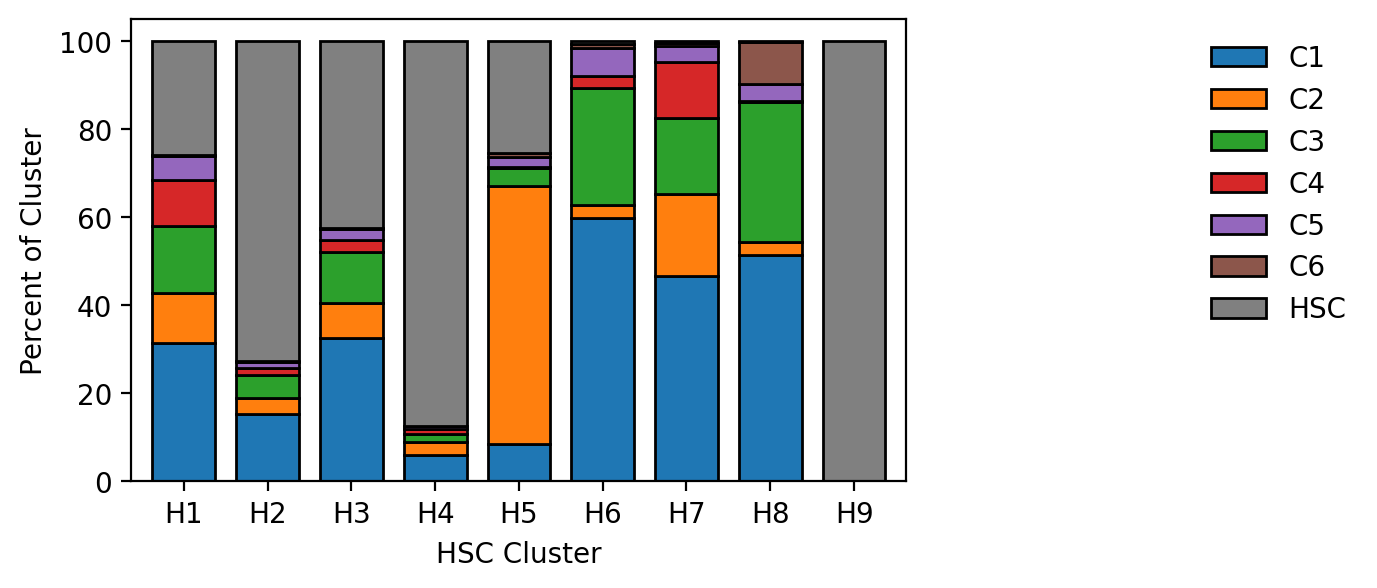

In [48]:
reload(plt2)
# Plot percentages

pdf = adata.obs.copy()

pdf = pdf.groupby(['hsc_cluster_str', 'OG_cluster_QC'], observed=True)['cell_id'].count()
pdf = pdf.reset_index()
pdf = pd.pivot_table(
    pdf, 
    index='hsc_cluster_str',
    columns='OG_cluster_QC',   
    values='cell_id',
)

pdf = pdf.rename(columns={'nan' : 'HSC'})

# Calculate percentages
pdf = pdf.div(pdf.sum(axis=1), axis=0) * 100

tab10_colors = plt.cm.get_cmap('tab10').colors  # Get colors from tab10
hex_colors = [plt.cm.tab10(i) for i in range(6)]  # Take the first 6

# Add grey
hex_colors.append("#808080")  # Add grey at the end

print(hex_colors)



plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5, 3

pdf.plot(
    kind='bar',
    stacked=True,
    width=0.75,
    color=hex_colors,
    ec='k',
)

plt.ylabel("Percent of Cluster")
plt.xlabel("HSC Cluster")
plt.gca().tick_params(axis='x', rotation=0)

sns.move_legend(plt.gca(),
                loc='upper right',
                title="",
                frameon=False,
                bbox_to_anchor=(1.6, 1),
               )

pdf.head()

# Expression

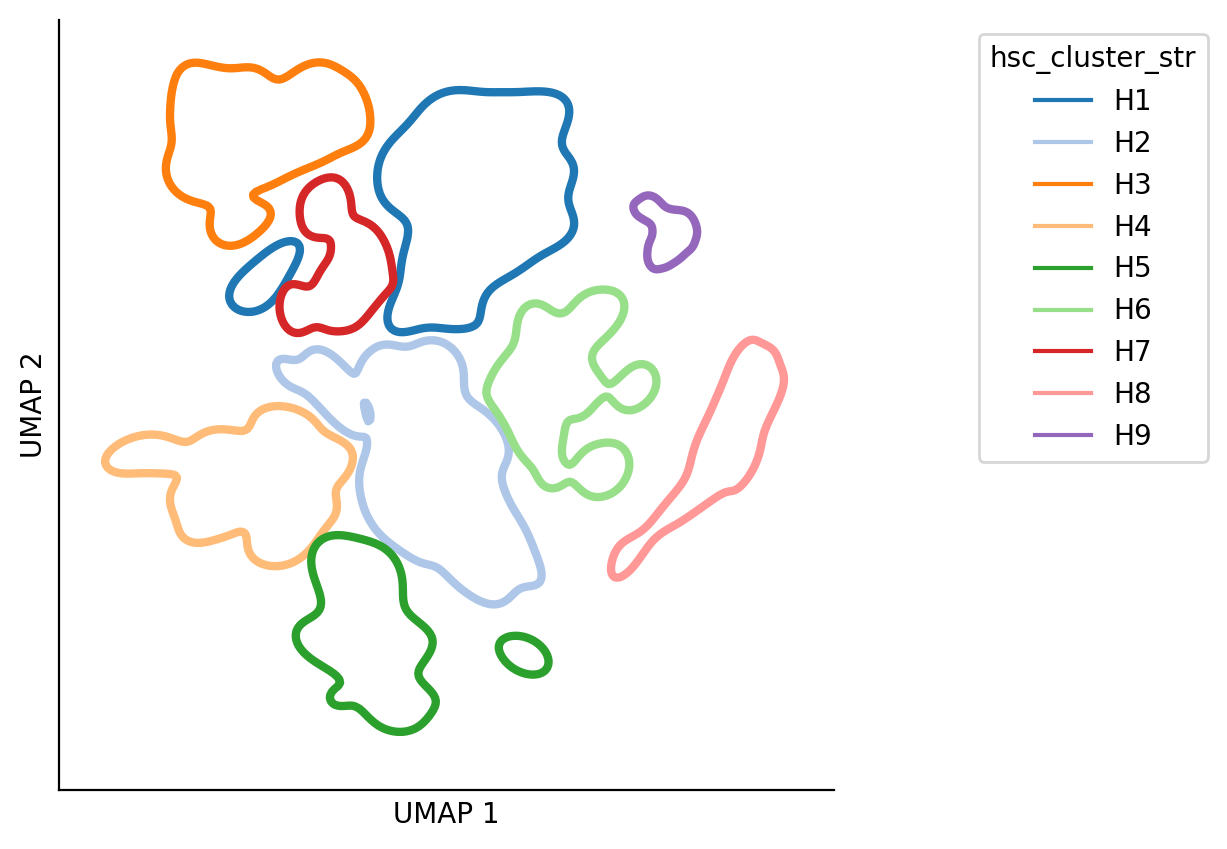

In [88]:
thresh = 0.2

sns.kdeplot(
    data=adata.obs, 
    x='UMAP 1', 
    y='UMAP 2', 
    levels=2,  
    thresh=thresh,
    hue='hsc_cluster_str',
    palette='tab20',
    linewidths=3,
    zorder=2,
)

sns.move_legend(
    plt.gca(),
    loc='upper right',
    bbox_to_anchor=(1.5, 1),
)

plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')
plt.gca().set_aspect('auto')
sns.despine()

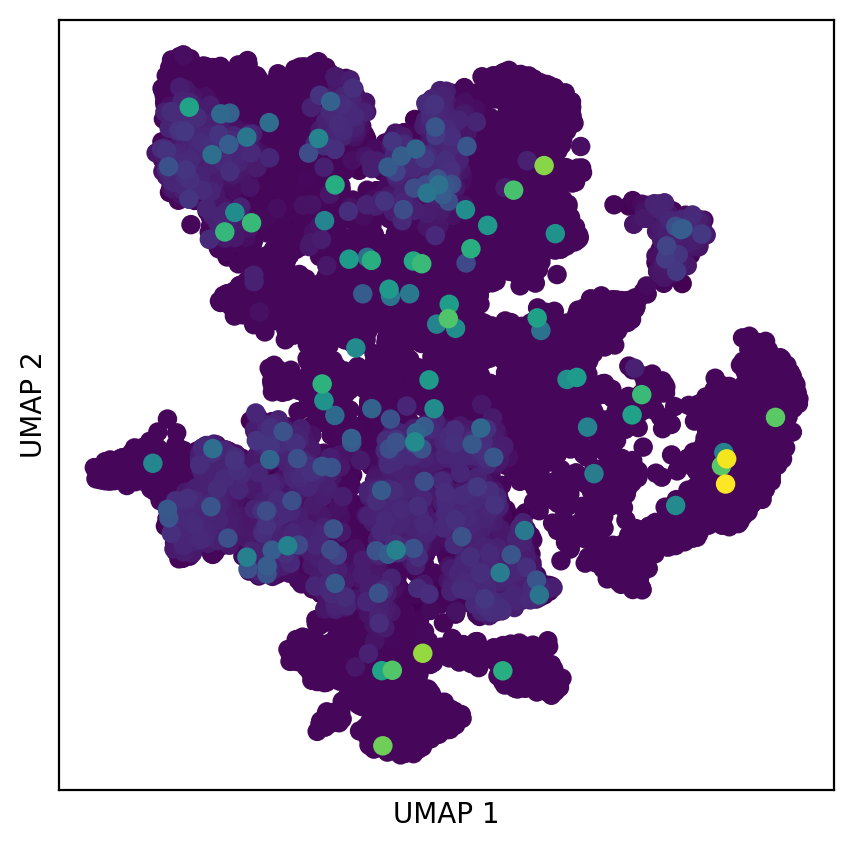

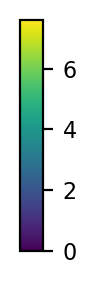

In [84]:
gene_list = [
    'MECOM',
    'FTH1',
    'BMP6', 
    'FLT3', 
    'CDK6', 
    'RPS4X',
    'RPS18', 
    'PP10', 
    'ELMO1',
    'JUNS', 
    'FOS', 
    'MED12L',
]

gene_list = [x for x in gene_list if x in adata.var['gene_name']]

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5, 5



for gene in gene_list:
    plt2.plot_umap_scatter(
        adata,
        color=gene,
    )
    
    break

# DEG

In [51]:
sc.tl.rank_genes_groups(
    adata, 
    groupby="hsc_cluster_str",
    method='wilcoxon',
    corr_method='benjamini-hochberg',
    pts=True,
    key_added='hsc_deg',
)

deg = sc.get.rank_genes_groups_df(
    adata, 
    group=None,
    key='hsc_deg',
)

deg.head()

,group,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference
0,H1,ZFP36,68.841187,2.638779,0.000000e+00,0.000000e+00,1.0,1.0
1,H1,MEOX1,17.451689,0.556975,3.342063e-68,9.011014e-65,1.0,1.0
2,H1,C1QTNF1,17.444378,0.102186,3.798328e-68,9.011014e-65,1.0,1.0
3,H1,STEAP1,17.390862,0.041065,9.676986e-68,1.221290e-64,1.0,1.0
4,H1,HCAR3,17.363342,-0.014270,1.563522e-67,1.221290e-64,1.0,1.0


In [75]:
sig = deg.copy()
n = 5
alpha = 0.01 
logfoldchanges = 1.0
pct_nz_reference = 1.0
pct_nz_group = 0.3

sig = sig[sig['pvals_adj'] < alpha]
sig = sig[sig['logfoldchanges'] > logfoldchanges]
sig = sig[sig['pct_nz_reference'] < pct_nz_reference]
sig = sig[sig['pct_nz_group'] > pct_nz_group]
sig = sig.sort_values(by=['group', 'logfoldchanges'], ascending=[True, False])
sig = sig.groupby('group').head(n)

sig

,group,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference
2623,H1,IL17REL,13.874722,2.250093,9.014299e-44,3.732147e-43,0.893589,0.886568
2563,H1,DNMT3L,13.907884,2.198343,5.673307e-44,2.386192e-43,0.918044,0.908955
2568,H1,TAAR5,13.907884,2.142427,5.673307e-44,2.386192e-43,0.918044,0.908955
3322,H1,DPRX,13.556956,2.130223,7.206535e-42,2.489649e-41,0.890945,0.743346
2560,H1,OR7D4,13.907884,2.125907,5.673307e-44,2.386192e-43,0.918044,0.908955
38020,H2,OR2AT4,-32.182472,2.718590,3.104674e-227,4.661900e-225,0.691797,0.878344
37460,H2,MC2R,-31.760033,2.652001,2.308267e-221,6.173723e-220,0.833984,0.927616
19177,H2,CDY2B,31.103327,2.629803,2.171532e-212,3.255591e-211,0.727344,0.333644
37531,H2,OR10Q1,-31.819853,2.522617,3.440158e-222,1.013969e-220,0.833594,0.927616
25038,H2,TEX43,15.126675,2.517886,1.080178e-51,1.579072e-51,0.310156,0.121910


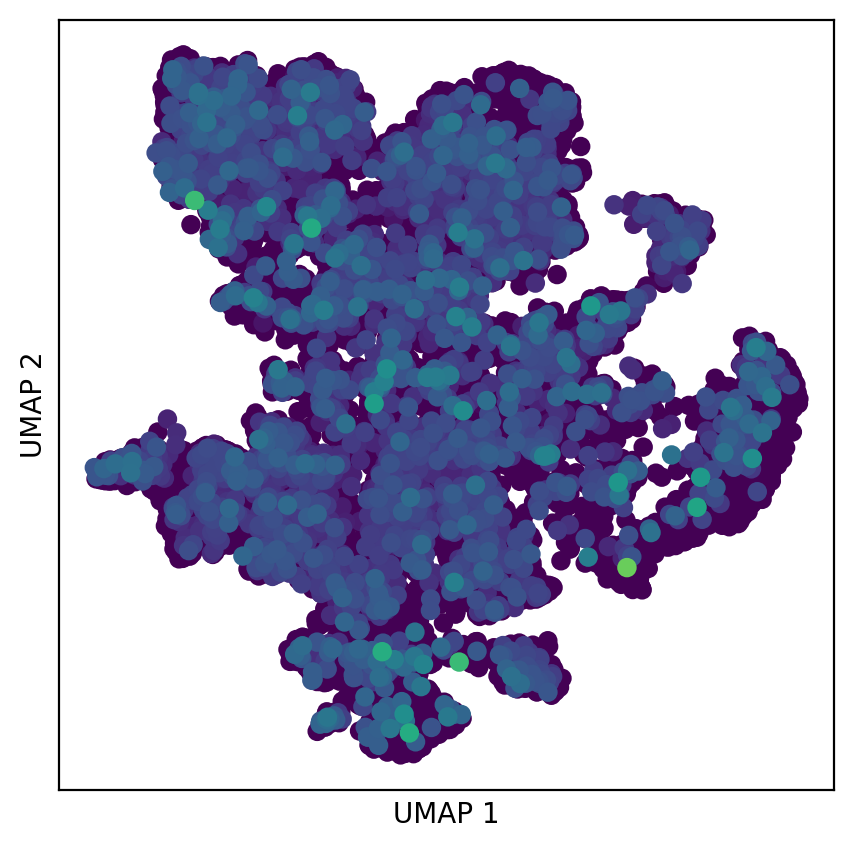

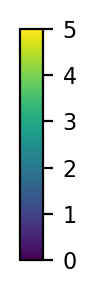

In [80]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5, 5

plt2.plot_umap_scatter(
    adata,
    color='GATA2',
    vmin=0,
    vmax=5,
    
)

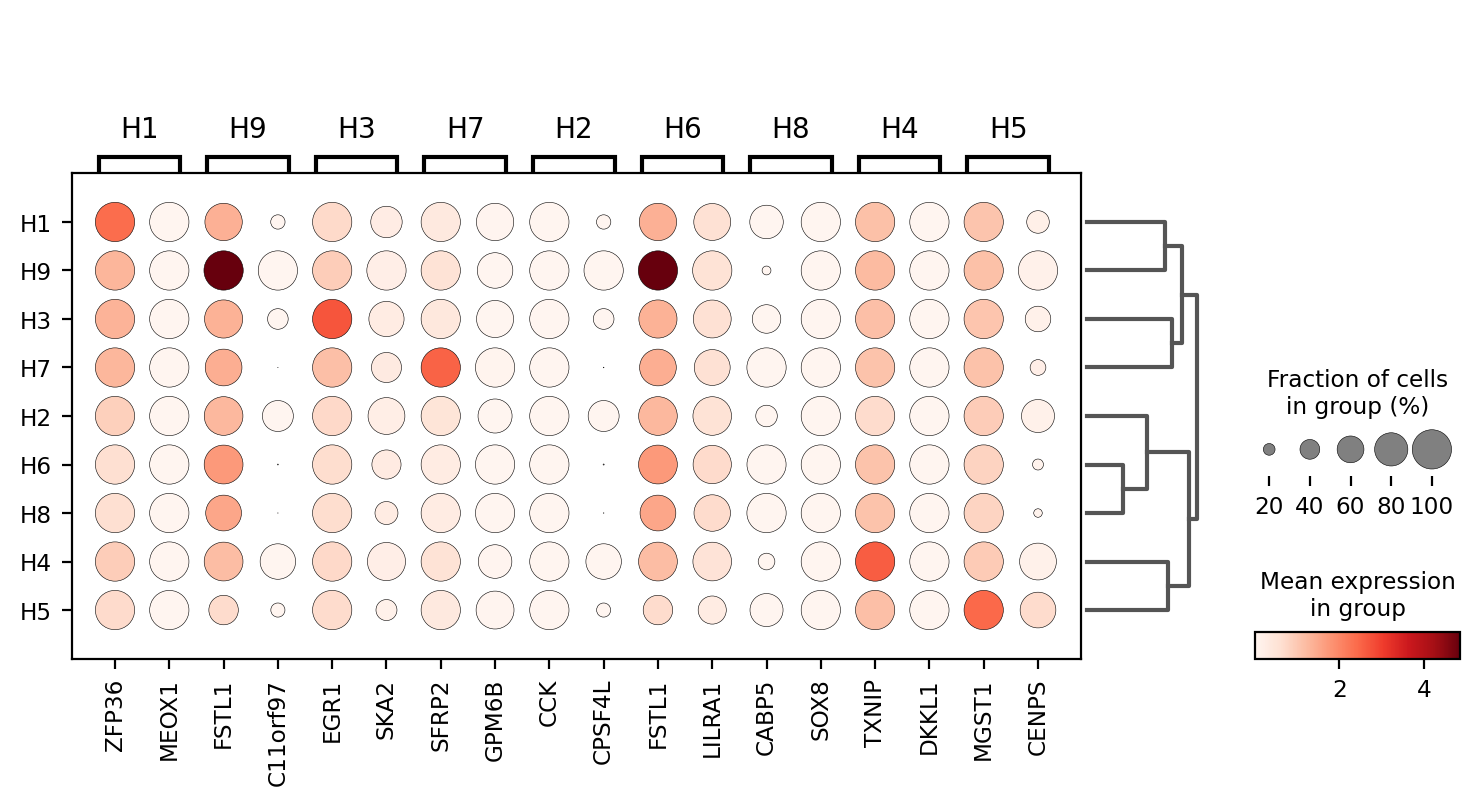

In [54]:
sc.pl.rank_genes_groups_dotplot(
    adata,
    n_genes=2,
    key='hsc_deg',
)

In [3]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

# DEG